In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
import sys
from tensorflow import keras

def initialize(data, k):
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
  
   
    for c_id in range(k - 1):
          
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
              
            for j in range(len(centroids)):
                temp_dist = (((point-centroids[j])**2).sum())**0.5
                d = min(d, temp_dist)
            dist.append(d)
              
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
       
    return centroids
def kmeans(dataset, k):
    #kemans++
    centroids =initialize(dataset, k)
    dic_centroids={}
    dic_centroids_old={}
    for i in range(0,k):
        dic_centroids[i]=[]
        dic_centroids_old[i]=[]
    convergio=False
    iteracion = 1
    while not convergio:
        #print("Iteracion:",iteracion)
        iteracion+=1
        classes=[]
        for i in range(0,len(dataset)):
            min_dist = np.inf
            c = -1
            for j in range(0,k):
                
                temp_dist=(((np.array(dataset[i])-np.array(centroids[j]))**2).sum())**0.5
                
                if temp_dist < min_dist:
                    c=j
                    min_dist=temp_dist
            classes.append(c)
            dic_centroids[c].append(dataset[i])
        
        iguales = True
        for i in range(0,k):
            temp = [sum(x)/len(x) for x in zip(*dic_centroids[i])]
            fin = True
            for j in range(0,len(temp)):
                if(temp[j]!=centroids[i][j]):
                    fin=False
            if not fin: 
                centroids[i]=temp
                iguales=False
            
            dic_centroids[i]=[]
        convergio=iguales   
       
       
    return centroids,classes





In [14]:
original_image = cv2.imread("diving.jpg")

In [22]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)


In [23]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

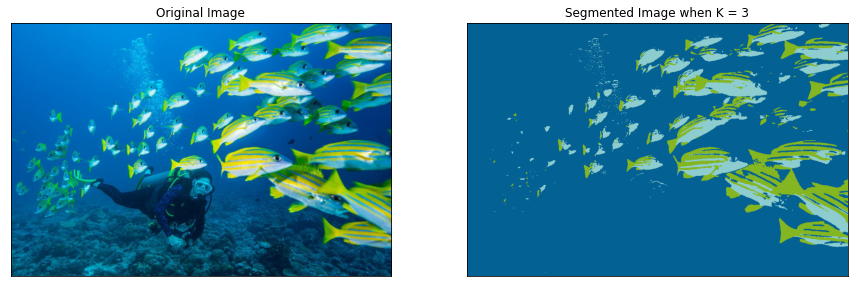

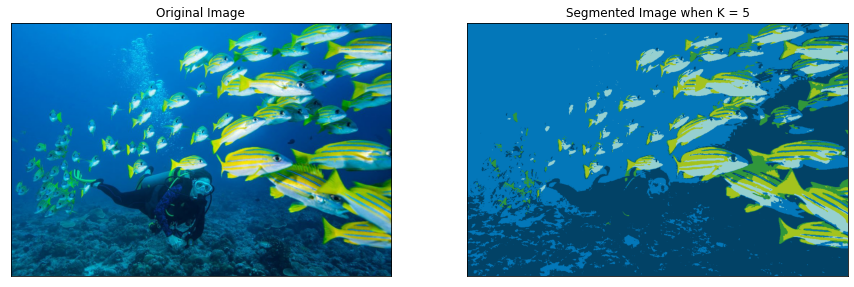

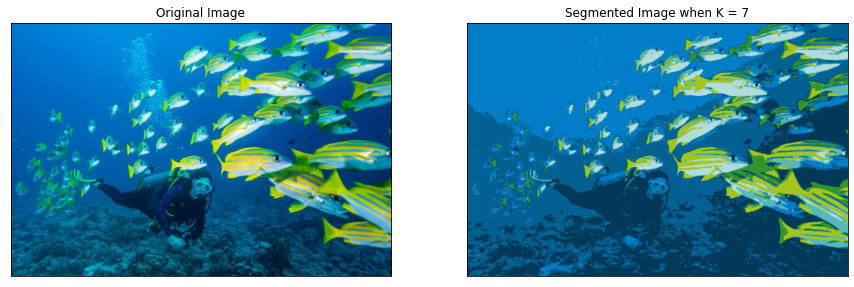

In [ ]:
for k in [3,5,7,9]:
    centroids,classes=kmeans(vectorized,k)
    centroids = np.uint8(centroids)
    res = centroids[np.array(classes).flatten()]
    result_image = res.reshape((img.shape))

    figure_size = 15
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(result_image)
    plt.title('Segmented Image when K = '+str(k)), plt.xticks([]), plt.yticks([])
    plt.show()